In [ ]:
# ==============================================================================
# UNIVERSIDADE FEDERAL DA BAHIA - INSTITUTO DE COMPUTAÇÃO
# DISCIPLINA: IC0004 - ALGORITMOS E GRAFOS
# DOCENTE: GEORGE MARCONI DE ARAÚJO LIMA
# DISCENTE: GABRIEL FERNANDES ROCHA
# ==============================================================================

# Trabalho Prático: CAMINHO HAMILTONIANO

## Parte C - Implementação

Para testar o código, basta substituir o caminho do txt abaixo

In [4]:
caminho_do_arquivo = "/content/drive/MyDrive/Colab Notebooks/Algoritmos e Grafos - Atividade 02/grafo_teste.txt"

In [5]:
import time

class HamiltonianoSolver:
    def __init__(self, filepath):
        self.n, self.m, self.adj = self._ler_arquivo(filepath)

    def _ler_arquivo(self, filepath):
        try:
            with open(filepath, 'r') as f:
                tokens = f.read().split()

            if not tokens:
                raise ValueError("O arquivo está vazio.")

            iterator = iter(tokens)

            try:
                n = int(next(iterator))
                m = int(next(iterator))
            except StopIteration:
                raise ValueError("O arquivo não possui o cabeçalho (n e m).")

            adj = [[] for _ in range(n)]

            arestas_lidas = 0
            for _ in range(m):
                try:
                    u = int(next(iterator))
                    v = int(next(iterator))

                    if u >= n or v >= n:
                        raise ValueError(f"Aresta refere-se a vértice {max(u,v)}, mas o grafo só tem {n} vértices (0 a {n-1}).")

                    adj[u].append(v)
                    adj[v].append(u)
                    arestas_lidas += 1
                except StopIteration:
                    raise ValueError(f"O cabeçalho diz que há {m} arestas, mas só foram encontradas {arestas_lidas} completas.")

            return n, m, adj

        except FileNotFoundError:
            raise FileNotFoundError(f"O arquivo não foi encontrado no caminho: {filepath}")
        except ValueError as ve:
            raise ve
        except Exception as e:
            raise Exception(f"Erro genérico na leitura: {e}")

    def resolver_backtracking(self):
        for start_node in range(self.n):
            visited = [False] * self.n
            visited[start_node] = True
            if self._backtrack_recursivo(start_node, 1, visited):
                return "SIM"
        return "NÃO"

    def _backtrack_recursivo(self, u, count, visited):
        if count == self.n:
            return True

        for v in self.adj[u]:
            if not visited[v]:
                visited[v] = True
                if self._backtrack_recursivo(v, count + 1, visited):
                    return True
                visited[v] = False
        return False

    def resolver_heuristica(self):
        for start_node in range(self.n):
            if self._nearest_neighbor(start_node):
                return "SIM"
        return "NÃO"

    def _nearest_neighbor(self, start_node):
        path_len = 1
        visited = {start_node}
        curr = start_node

        while path_len < self.n:
            candidatos = [v for v in self.adj[curr] if v not in visited]

            if not candidatos:
                return False

            prox = candidatos[0]
            visited.add(prox)
            curr = prox
            path_len += 1

        return True

def resolver_caminho_hamiltoniano(caminho_txt):
    print(f"\nLendo arquivo: {caminho_txt}")

    try:
        solver = HamiltonianoSolver(caminho_txt)
    except Exception as e:
        print(f"Erro: {e}")
        return

    print(f"Grafo carregado: {solver.n} Vértices | {solver.m} Arestas")
    print("-" * 50)
    print('\n')
    print("Executando algoritmo Exato")
    inicio = time.time()
    res_exato = solver.resolver_backtracking()
    tempo_exato = time.time() - inicio
    print(f"1. [EXATO - Backtracking] Resposta: {res_exato} | Tempo: {tempo_exato:.6f}s")

    print('\n')

    print("Executando Heurística")
    inicio = time.time()
    res_heur = solver.resolver_heuristica()
    tempo_heur = time.time() - inicio
    print(f"2. [HEURÍSTICA - Guloso]  Resposta: {res_heur} | Tempo: {tempo_heur:.6f}s")
    print('\n')
    print("-" * 50)

In [6]:
resolver_caminho_hamiltoniano(caminho_do_arquivo)


Lendo arquivo: /content/drive/MyDrive/Colab Notebooks/Algoritmos e Grafos - Atividade 02/grafo_teste.txt
Grafo carregado: 10 Vértices | 11 Arestas
--------------------------------------------------


Executando algoritmo Exato
1. [EXATO - Backtracking] Resposta: SIM | Tempo: 0.000042s


Executando Heurística
2. [HEURÍSTICA - Guloso]  Resposta: SIM | Tempo: 0.000023s


--------------------------------------------------


## Parte D - Experimentos

CONFIGURAÇÃO:

1. TAMANHOS: Lista com a quantidade de vértices (N) que serão testados.
2. LIMITE_N_EXATO: Trava de segurança para o algoritmo de Backtracking (O(n!)). Se N for maior que este número, o script PULA o algoritmo exato para evitar que o computador trave ou demore horas.
3. DENSIDADES: Probabilidade de haver uma aresta entre dois vértices (0.0 a 1.0).
4. REPETICOES: Quantos grafos aleatórios são gerados para cada teste. O script roda 3 vezes e tira a média para evitar casos de sorte/azar.

In [ ]:
TAMANHOS = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

LIMITE_N_EXATO = 25
DENSIDADES = {'Esparso (20%)': 0.2, 'Denso (80%)': 0.8}
REPETICOES = 3

INICIANDO EXPERIMENTOS (N=5 até 50)
N=05 | Esparso (20%) | Exato: 0.0000s | Heur: 0.00001s
N=05 | Denso (80%) | Exato: 0.0000s | Heur: 0.00000s
N=10 | Esparso (20%) | Exato: 0.0001s | Heur: 0.00003s
N=10 | Denso (80%) | Exato: 0.0000s | Heur: 0.00003s
N=15 | Esparso (20%) | Exato: 0.0013s | Heur: 0.00003s
N=15 | Denso (80%) | Exato: 0.0000s | Heur: 0.00001s
N=20 | Esparso (20%) | Exato: 0.1577s | Heur: 0.00007s
N=20 | Denso (80%) | Exato: 0.0000s | Heur: 0.00011s
N=25 | Esparso (20%) | Exato: 44.3640s | Heur: 0.00014s
N=25 | Denso (80%) | Exato: 0.0000s | Heur: 0.00012s
N=30 | Esparso (20%) | Exato: TIMEOUT | Heur: 0.00022s
N=30 | Denso (80%) | Exato: TIMEOUT | Heur: 0.00003s
N=35 | Esparso (20%) | Exato: TIMEOUT | Heur: 0.00034s
N=35 | Denso (80%) | Exato: TIMEOUT | Heur: 0.00031s
N=40 | Esparso (20%) | Exato: TIMEOUT | Heur: 0.00042s
N=40 | Denso (80%) | Exato: TIMEOUT | Heur: 0.00004s
N=45 | Esparso (20%) | Exato: TIMEOUT | Heur: 0.00067s
N=45 | Denso (80%) | Exato: TIMEOUT | Heur: 

,N,Densidade,Tempo Exato (s),Passos Exato,Exato (% SIM),Tempo Heurística (s),Passos Heurística,Heurística (% SIM)
0,5,Esparso (20%),0.00001,11.00000,0.00000,0.00001,14.66667,0.00000
1,5,Denso (80%),0.00000,5.00000,100.00000,0.00000,5.00000,100.00000
2,10,Esparso (20%),0.00007,240.00000,0.00000,0.00003,46.66667,0.00000
3,10,Denso (80%),0.00002,16.00000,100.00000,0.00003,63.33333,100.00000
4,15,Esparso (20%),0.00132,7068.66667,33.33333,0.00003,115.66667,0.00000
5,15,Denso (80%),0.00001,15.00000,100.00000,0.00001,15.00000,100.00000
6,20,Esparso (20%),0.15767,849333.33333,66.66667,0.00007,206.00000,0.00000
7,20,Denso (80%),0.00001,34.33333,100.00000,0.00011,223.00000,100.00000
8,25,Esparso (20%),44.36399,224700562.66667,66.66667,0.00014,469.00000,0.00000
9,25,Denso (80%),0.00001,37.00000,100.00000,0.00012,218.66667,66.66667


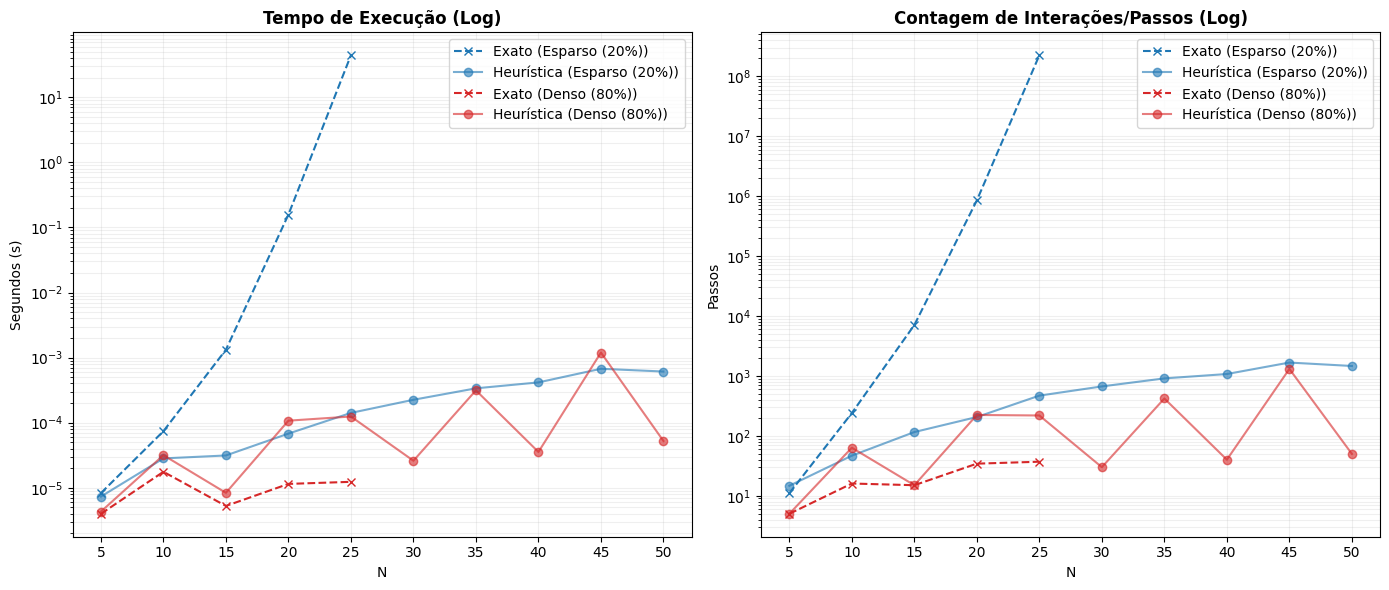

In [ ]:
import time
import random
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

class HamiltonianoSolver:
    def __init__(self, filepath):
        self.n, self.m, self.adj = self._ler_arquivo(filepath)
        self.passos = 0

    def _ler_arquivo(self, filepath):
        try:
            with open(filepath, 'r') as f:
                tokens = f.read().split()
            if not tokens: raise ValueError("Arquivo vazio.")
            iterator = iter(tokens)
            n = int(next(iterator))
            m = int(next(iterator))
            adj = [[] for _ in range(n)]
            for _ in range(m):
                try:
                    u = int(next(iterator))
                    v = int(next(iterator))
                    adj[u].append(v)
                    adj[v].append(u)
                except StopIteration:
                    break
            return n, m, adj
        except Exception:
            return 0, 0, []

    def resolver_backtracking(self):
        self.passos = 0
        for start_node in range(self.n):
            visited = [False] * self.n
            visited[start_node] = True
            if self._backtrack_recursivo(start_node, 1, visited):
                return "SIM", self.passos
        return "NÃO", self.passos

    def _backtrack_recursivo(self, u, count, visited):
        self.passos += 1
        if count == self.n:
            return True
        for v in self.adj[u]:
            if not visited[v]:
                visited[v] = True
                if self._backtrack_recursivo(v, count + 1, visited):
                    return True
                visited[v] = False
        return False

    def resolver_heuristica(self):
        self.passos = 0
        for start_node in range(self.n):
            if self._nearest_neighbor(start_node):
                return "SIM", self.passos
        return "NÃO", self.passos

    def _nearest_neighbor(self, start_node):
        path_len = 1
        visited = {start_node}
        curr = start_node
        self.passos += 1

        while path_len < self.n:
            candidatos = [v for v in self.adj[curr] if v not in visited]
            self.passos += 1
            if not candidatos:
                return False
            prox = candidatos[0]
            visited.add(prox)
            curr = prox
            path_len += 1
        return True

def gerar_grafo(n, densidade, path):
    arestas = []
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < densidade:
                arestas.append((i, j))
    with open(path, 'w') as f:
        f.write(f"{n} {len(arestas)}\n")
        for u, v in arestas:
            f.write(f"{u} {v}\n")

def rodar_bateria():
    resultados = []
    print(f"INICIANDO EXPERIMENTOS (N={min(TAMANHOS)} até {max(TAMANHOS)})")

    for n in TAMANHOS:
        for nome_dens, prob in DENSIDADES.items():

            tempos_exato, passos_exato, sucessos_exato = [], [], []
            tempos_heur, passos_heur, sucessos_heur = [], [], []

            for i in range(REPETICOES):
                arquivo = f"temp_{n}_{i}.txt"
                gerar_grafo(n, prob, arquivo)

                try:
                    solver = HamiltonianoSolver(arquivo)

                    if n <= LIMITE_N_EXATO:
                        inicio = time.time()
                        res, passos = solver.resolver_backtracking()
                        tempos_exato.append(time.time() - inicio)
                        passos_exato.append(passos)
                        sucessos_exato.append(1 if res == "SIM" else 0)
                    else:
                        tempos_exato.append(np.nan)
                        passos_exato.append(np.nan)
                        sucessos_exato.append(np.nan)

                    inicio = time.time()
                    res_h, passos_h = solver.resolver_heuristica()
                    tempos_heur.append(time.time() - inicio)
                    passos_heur.append(passos_h)
                    sucessos_heur.append(1 if res_h == "SIM" else 0)

                finally:
                    if os.path.exists(arquivo): os.remove(arquivo)

            mean_t_exato = np.nanmean(tempos_exato) if not all(np.isnan(tempos_exato)) else np.nan
            mean_p_exato = np.nanmean(passos_exato) if not all(np.isnan(passos_exato)) else np.nan
            taxa_exato = (np.nanmean(sucessos_exato) * 100) if not all(np.isnan(sucessos_exato)) else np.nan

            mean_t_heur = np.mean(tempos_heur)
            taxa_heur = np.mean(sucessos_heur) * 100

            resultados.append({
                'N': n,
                'Densidade': nome_dens,


                'Tempo Exato (s)': mean_t_exato,
                'Passos Exato': mean_p_exato,
                'Exato (% SIM)': taxa_exato,

                'Tempo Heurística (s)': mean_t_heur,
                'Passos Heurística': np.mean(passos_heur),
                'Heurística (% SIM)': taxa_heur,
            })

            status = f"{mean_t_exato:.4f}s" if not np.isnan(mean_t_exato) else "TIMEOUT"
            print(f"N={n:02d} | {nome_dens} | Exato: {status} | Heur: {mean_t_heur:.5f}s")

    return pd.DataFrame(resultados)

def plotar_painel(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    cores = {'Esparso (20%)': '#1f77b4', 'Denso (80%)': '#d62728'}
    ticks_x = df['N'].unique()

    for dens in DENSIDADES.keys():
        data = df[df['Densidade'] == dens]

        valid = data.dropna(subset=['Tempo Exato (s)'])
        ax1.plot(valid['N'], valid['Tempo Exato (s)'], 'x--', label=f'Exato ({dens})', color=cores[dens])
        ax1.plot(data['N'], data['Tempo Heurística (s)'], 'o-', label=f'Heurística ({dens})', color=cores[dens], alpha=0.6)

    ax1.set_yscale('log')
    ax1.set_title('Tempo de Execução (Log)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Segundos (s)')
    ax1.set_xlabel('N')
    ax1.set_xticks(ticks_x)
    ax1.grid(True, which="both", ls="-", alpha=0.2)
    ax1.legend()

    for dens in DENSIDADES.keys():
        data = df[df['Densidade'] == dens]

        valid = data.dropna(subset=['Passos Exato'])
        ax2.plot(valid['N'], valid['Passos Exato'], 'x--', color=cores[dens], label=f'Exato ({dens})')
        ax2.plot(data['N'], data['Passos Heurística'], 'o-', color=cores[dens], alpha=0.6, label=f'Heurística ({dens})')

    ax2.set_yscale('log')
    ax2.set_title('Contagem de Interações/Passos (Log)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Passos')
    ax2.set_xlabel('N')
    ax2.set_xticks(ticks_x)
    ax2.grid(True, which="both", ls="-", alpha=0.2)
    ax2.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    df_res = rodar_bateria()

    print("\n" + "="*100)
    print("TABELA DE RESULTADOS (MÉDIAS)")
    print("Nota: '% SIM' indica a taxa de sucesso em encontrar o caminho.")
    print("="*100)

    tabela = df_res.copy()
    tabela.fillna("-", inplace=True)

    try:
        pd.options.display.float_format = '{:.5f}'.format
        display(tabela)
    except:
        print(tabela.to_string(index=False))

    plotar_painel(df_res)